## NYC AirBnb Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


df = pd.read_csv(r'C:\Users\SKD\Downloads\new-york-airbnb-data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37784 non-null  int64  
 1   name                            37782 non-null  object 
 2   host_id                         37784 non-null  int64  
 3   host_response_time              22199 non-null  object 
 4   host_response_rate              22199 non-null  object 
 5   host_acceptance_rate            22912 non-null  object 
 6   host_listings_count             37778 non-null  float64
 7   host_total_listings_count       37778 non-null  float64
 8   neighbourhood_cleansed          37784 non-null  object 
 9   neighbourhood_group_cleansed    37784 non-null  object 
 10  latitude                        37784 non-null  float64
 11  longitude                       37784 non-null  float64
 12  property_type                   

In [4]:
df.head()

,id,name,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_365,first_review,last_review,review_scores_rating,reviews_per_month,price,neighborhood_overview,number_of_reviews,calculated_host_listings_count,minimum_nights
0,39572,1 br in a 2 br apt (Midtown West),169927,within a day,100%,NaN,2.0,2.0,Hell's Kitchen,Manhattan,...,365,8/31/2010,1/3/2019,4.86,0.25,$139.00,NaN,44,2,30
1,39593,A lovely room w/ a Manhattan view,110506,within a few hours,100%,60%,1.0,1.0,Sunnyside,Queens,...,248,9/14/2010,8/5/2024,4.93,0.20,$78.00,"Nate Silver called this super safe, clean, qui...",34,1,31
2,39704,"Private, Large & Sunny 1BR w/W&D",170510,NaN,NaN,NaN,2.0,4.0,Bedford-Stuyvesant,Brooklyn,...,0,8/23/2010,12/12/2019,4.71,1.93,NaN,The Neighborhood<br />• Rich History <br />• B...,337,2,30
3,42300,Beautiful Lower East Side Loft,184755,within a day,100%,100%,1.0,1.0,Lower East Side,Manhattan,...,87,8/8/2010,8/31/2024,4.80,0.40,$750.00,"The apartment is in the border of Soho, LES an...",70,1,30
4,42300,@HouseOnHenrySt - Private 2nd bedroom w/shared...,11481,within a day,67%,33%,6.0,12.0,Carroll Gardens,Brooklyn,...,364,9/13/2010,11/2/2023,4.66,1.26,$185.00,"Lovely old Brooklyn neighborhood, with brick/b...",220,4,30


In [5]:
df.tail()

,id,name,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_365,first_review,last_review,review_scores_rating,reviews_per_month,price,neighborhood_overview,number_of_reviews,calculated_host_listings_count,minimum_nights
37779,42300,"The Gem of Riverdale, NYC!",35391290,within a day,50%,100%,3.0,3.0,Kingsbridge,Bronx,...,365,NaN,NaN,NaN,NaN,$159.00,NaN,0,3,30
37780,42300,Amazing 1BR & 1BTH,504878421,within a few hours,100%,100%,4.0,5.0,Financial District,Manhattan,...,306,NaN,NaN,NaN,NaN,$199.00,NaN,0,3,30
37781,42300,Home Share w/ Young Professionals - 2/3/4/5 Tr...,2822805,within an hour,98%,71%,24.0,28.0,Crown Heights,Brooklyn,...,65,NaN,NaN,NaN,NaN,$99.00,NaN,0,21,30
37782,42300,Bedroom for rent in two bedroom UWS apartment,666385153,NaN,NaN,NaN,1.0,1.0,Upper West Side,Manhattan,...,83,NaN,NaN,NaN,NaN,$131.00,NaN,0,1,30
37783,42300,Bright room with in-building washer/dryer-394,41475188,within a few hours,95%,49%,16.0,46.0,Crown Heights,Brooklyn,...,336,NaN,NaN,NaN,NaN,$47.00,NaN,0,13,30


In [6]:
df['price'] = df['price'].replace('[\$,]','', regex=True).astype(float)
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype(float)

In [7]:
# Statistical summary
df.describe()

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,availability_30,availability_60,availability_90,availability_365,review_scores_rating,reviews_per_month,price,number_of_reviews,calculated_host_listings_count,minimum_nights
count,37784.000000,3.778400e+04,22199.000000,22912.000000,37778.000000,37778.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,25892.000000,25892.000000,22969.000000,37784.000000,37784.000000,37784.000000
mean,42299.787450,1.698767e+08,91.916528,76.927767,263.096326,351.484568,40.728805,-73.947311,2.754896,12.314075,27.011275,42.416552,163.400963,4.724280,0.866954,195.224128,25.658639,71.636354,28.882172
std,23.858611,1.850207e+08,22.038353,29.037988,1000.435105,1196.902978,0.056120,0.054543,1.903900,13.408262,26.656382,39.790892,148.521232,0.449122,1.885964,353.251037,62.619846,224.585038,29.905150
min,39572.000000,1.678000e+03,0.000000,0.000000,1.000000,1.000000,40.500366,-74.251907,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,8.000000,0.000000,1.000000,1.000000
25%,42300.000000,1.747741e+07,98.000000,63.000000,1.000000,1.000000,40.688662,-73.983316,2.000000,0.000000,0.000000,0.000000,0.000000,4.647500,0.090000,82.000000,0.000000,1.000000,30.000000
50%,42300.000000,8.703937e+07,100.000000,88.000000,2.000000,3.000000,40.726379,-73.954930,2.000000,2.000000,23.000000,41.000000,155.000000,4.850000,0.290000,132.000000,3.000000,2.000000,30.000000
75%,42300.000000,3.052402e+08,100.000000,100.000000,10.000000,15.000000,40.762310,-73.928196,4.000000,29.000000,58.000000,88.000000,329.000000,5.000000,1.000000,223.000000,22.000000,9.000000,30.000000
max,42300.000000,6.691812e+08,100.000000,100.000000,5079.000000,9048.000000,40.911390,-73.713650,16.000000,30.000000,60.000000,90.000000,365.000000,5.000000,116.300000,20000.000000,2485.000000,1154.000000,1250.000000


## Data Cleaning 

In [8]:
df.isnull().sum()

id                                    0
name                                  2
host_id                               0
host_response_time                15585
host_response_rate                15585
host_acceptance_rate              14872
host_listings_count                   6
host_total_listings_count             6
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
amenities                             0
has_availability                   5284
availability_30                       0
availability_60                       0
availability_90                       0
availability_365                      0
first_review                      11892
last_review                       11892
review_scores_rating              11892
reviews_per_month                 11892


In [9]:
df.fillna({'name' : 'not present', 'reviews_per_month' : 0, 'price' : 0} , inplace=True)

In [10]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_response_time                15585
host_response_rate                15585
host_acceptance_rate              14872
host_listings_count                   6
host_total_listings_count             6
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
amenities                             0
has_availability                   5284
availability_30                       0
availability_60                       0
availability_90                       0
availability_365                      0
first_review                      11892
last_review                       11892
review_scores_rating              11892
reviews_per_month                     0


## Column type
- Numerical = price, accommodates, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365
- Categorical = host_response_time, neighbourhood_cleansed, neighbourhood_group_cleansed, property_type, room_type

C:\Users\SKD\AppData\Local\Temp\ipykernel_21316\2150739001.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\SKD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SKD\AppData\Local\Temp\ipykernel_21316\2150739001.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `h

<Axes: xlabel='availability_365', ylabel='Density'>

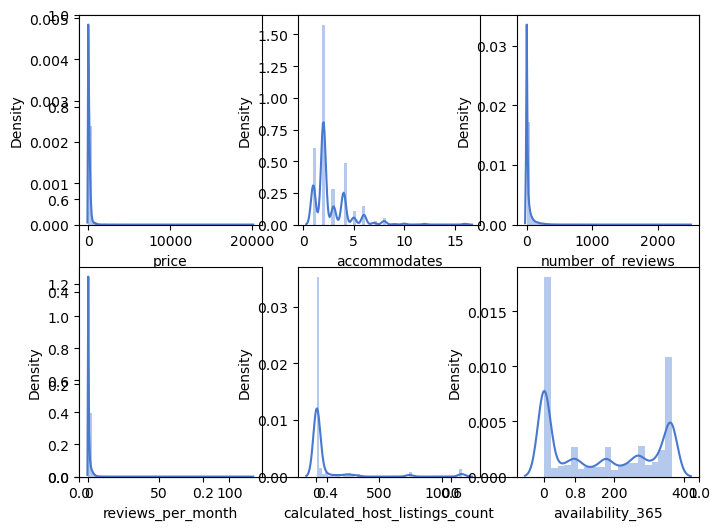

In [11]:
sns.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize = (8,6))

subplot(2,3,1)
sns.distplot(df['price'])

subplot(2,3,2)
sns.distplot(df['accommodates'])

subplot(2,3,3)
sns.distplot(df['number_of_reviews'])

subplot(2,3,4)
sns.distplot(df['reviews_per_month'])

subplot(2,3,5)
sns.distplot(df['calculated_host_listings_count'])

subplot(2,3,6)
sns.distplot(df['availability_365'])

<Axes: ylabel='availability_365'>

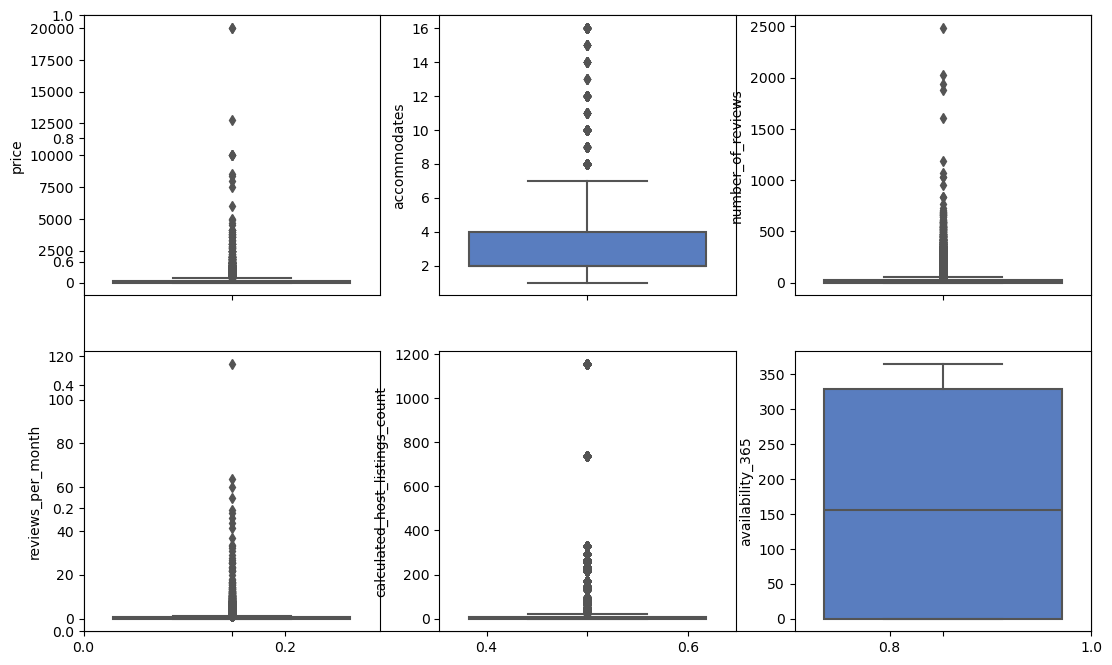

In [12]:
from pylab import * 
f, ax = plt.subplots(figsize= (13,8))

subplot(2,3,1)
sns.boxplot(y = df['price'])

subplot(2,3,2)
sns.boxplot(y = df['accommodates'])

subplot(2,3,3)
sns.boxplot(y = df['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = df['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = df['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y = df['availability_365'])

## Conclusion 
- Price: Highly right-skewed; most listings are under $200, but extreme outliers (up to $20,000) distort the average, making the median a more reliable metric.
- Booking Activity: Most properties have 0 to 50 reviews, indicating a heavy concentration of newer or less frequent rentals.
- Host Scale: The vast majority of hosts manage only 1–2 listings, though a small group of "mega-hosts" creates a long tail in the distribution.
- Availability: Shows a bimodal distribution; listings are typically either "rarely available" (0–30 days) or "year-round rentals" (300+ days).
- Capacity: The market is built for small groups, with most units accommodating 2–4 guests.
### Key Conclusion
To prevent these extreme outliers from "squashing" our future charts, data should be filtered (e.g., Price < $1,000) for the next phase of analysis.

## Neighbourhood group

In [13]:
list(df['neighbourhood_group_cleansed'].unique())

['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island']

In [14]:
df['neighbourhood_group_cleansed'].value_counts()

neighbourhood_group_cleansed
Manhattan        16819
Brooklyn         13835
Queens            5555
Bronx             1208
Staten Island      367
Name: count, dtype: int64

<Axes: ylabel='count'>

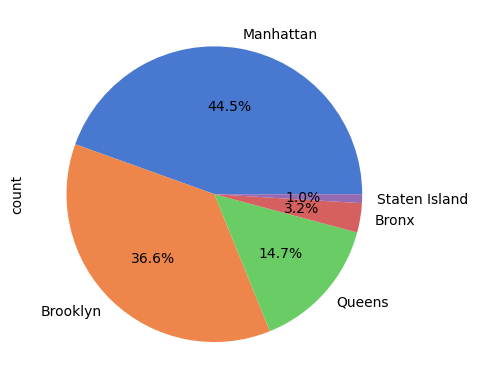

In [15]:
df['neighbourhood_group_cleansed'].value_counts().plot(kind='pie',autopct='%0.1f%%')

## Host response time 

In [16]:
list(df['host_response_time'].unique())

['within a day',
 'within a few hours',
 nan,
 'within an hour',
 'a few days or more']

<Axes: xlabel='host_response_time'>

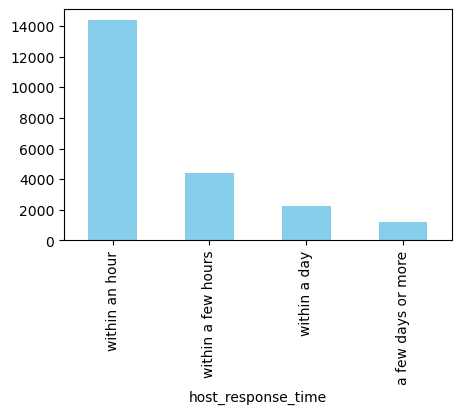

In [17]:
plt.figure(figsize=(5, 3))
df['host_response_time'].value_counts().plot(kind='bar', color = 'skyblue')

## Property type

In [18]:
df['property_type'].value_counts()

property_type
Entire rental unit             15887
Private room in rental unit    10572
Private room in home            2563
Room in hotel                   1410
Entire home                     1340
                               ...  
Private room in floor              1
Entire bed and breakfast           1
Private room in farm stay          1
Private room in in-law             1
Shared room in guest suite         1
Name: count, Length: 69, dtype: int64

<Axes: xlabel='property_type'>

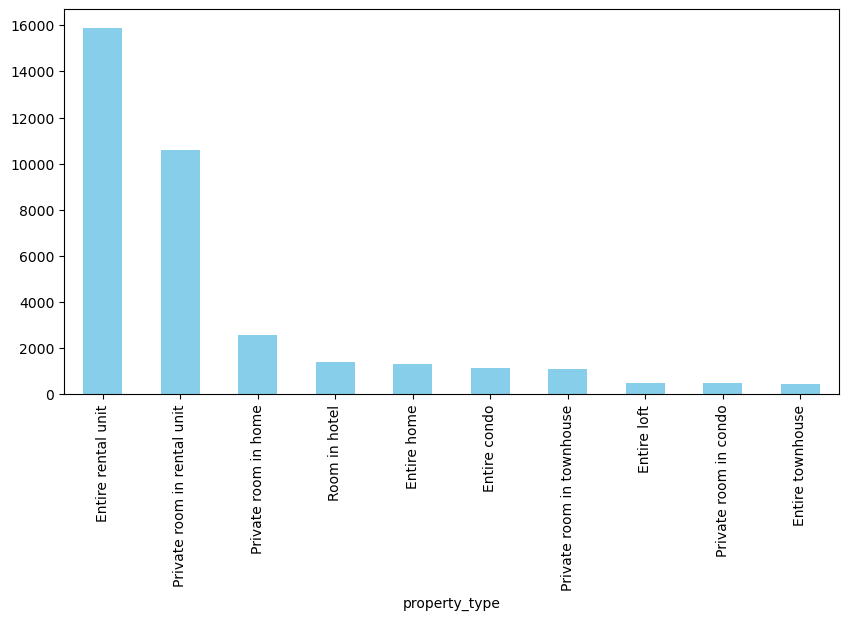

In [18]:
property_type = df['property_type'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
property_type.plot(kind='bar', color='skyblue')

## Room Type 

In [19]:
df['room_type'].value_counts()

room_type
Entire home/apt    20160
Private room       16932
Hotel room           564
Shared room          128
Name: count, dtype: int64

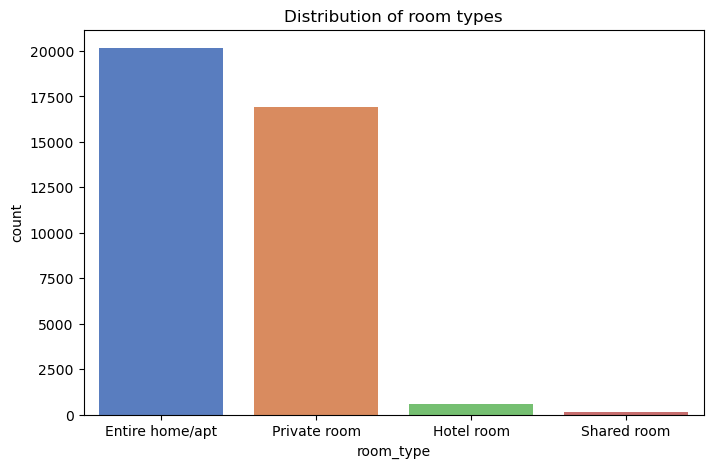

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='room_type', data=df, order=['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'])
plt.title('Distribution of room types')
plt.show()

## Univariate Distribution of Price, Room Type, and Neighbourhood Groups

C:\Users\SKD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


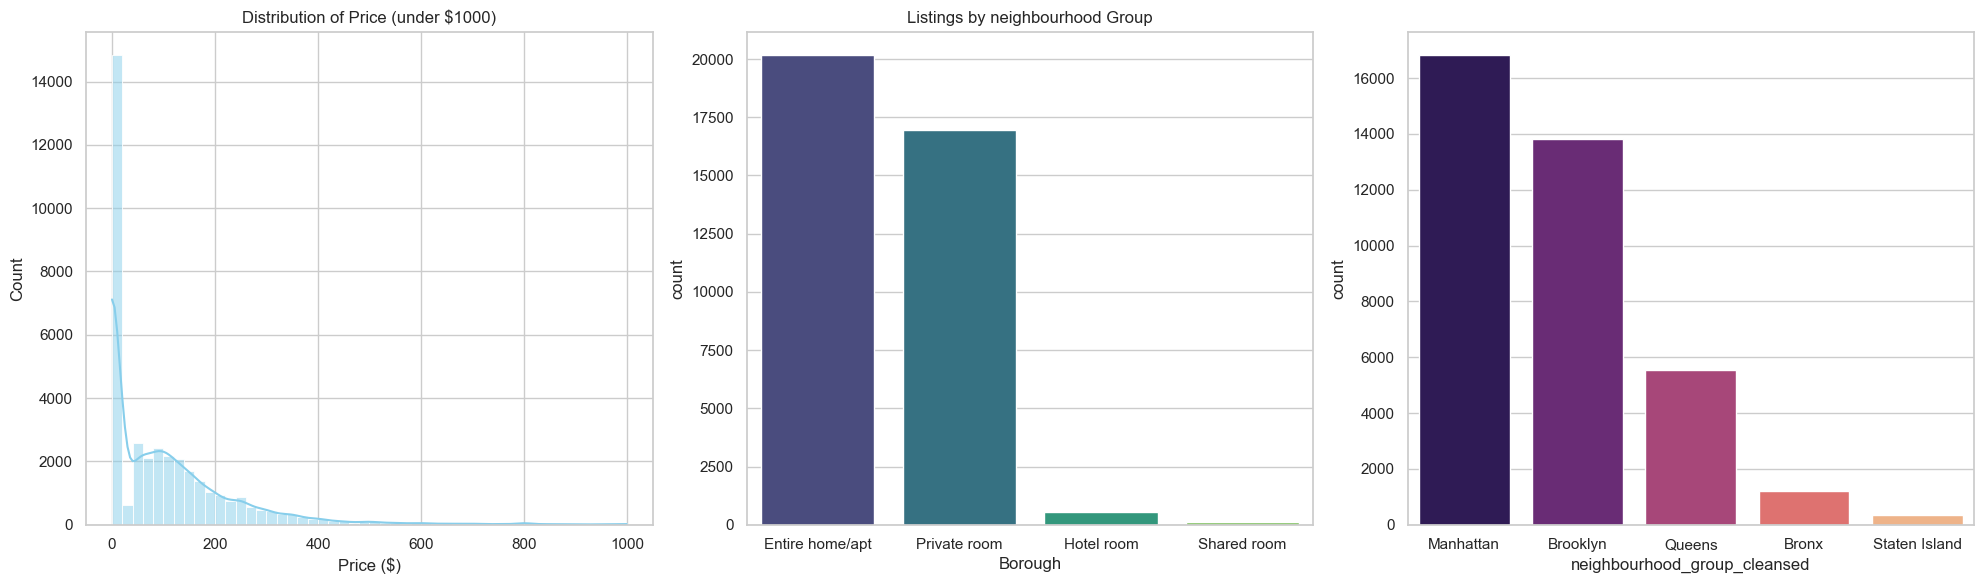

In [21]:
sns.set_theme(style = 'whitegrid')
fig, axes = plt.subplots(1, 3 , figsize=(20, 6))

sns.histplot(df[df['price'] < 1000]['price'], bins = 50, kde= True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Price (under $1000)')
axes[0].set_xlabel('Price ($)')

sns.countplot(data=df, x='room_type', ax = axes[1], palette = 'viridis', order =  df['room_type'].value_counts().index)
axes[1].set_title('Listings by Room Type')
axes[1].set_xlabel('Room Type')

sns.countplot(data=df, x='neighbourhood_group_cleansed', ax=axes[2], palette = 'magma', order= df['neighbourhood_group_cleansed'].value_counts().index)
axes[1].set_title('Listings by neighbourhood Group')
axes[1].set_xlabel('Borough')
plt.tight_layout()
plt.show()


## Bivariate Analysis
Number of reviews vs price 

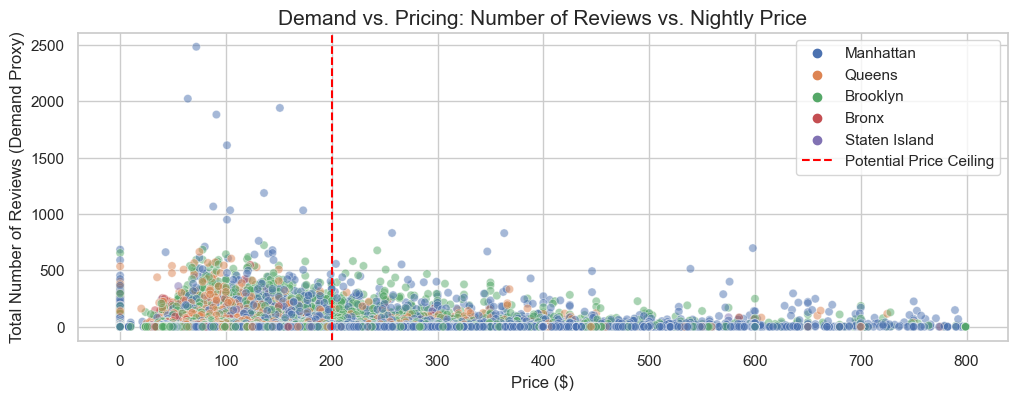

In [35]:
plt.figure(figsize=(12, 4))

sns.scatterplot(data=df[df['price'] < 800], x='price', y='number_of_reviews', 
                hue='neighbourhood_group_cleansed', alpha=0.5)

plt.axvline(x=200, color='red', linestyle='--', label='Potential Price Ceiling')

plt.title('Demand vs. Pricing: Number of Reviews vs. Nightly Price', fontsize=15)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Total Number of Reviews (Demand Proxy)', fontsize=12)
plt.legend()
plt.show()

## Conclusion
- High Demand: Listings priced between $50 and $150 have the most reviews (highest popularity). This is the best price range for a host who wants their room to be booked every single night.

- Luxury Gap: Above $400, the number of reviews drops significantly. These hosts make money by charging more per stay, but they likely deal with many "empty" nights where no one is booking.

- Business Goal: To grow a new Airbnb business quickly, a host should stay below $200 to collect reviews fast and build a "Superhost" reputation.

Neighbourhood Group vs Price

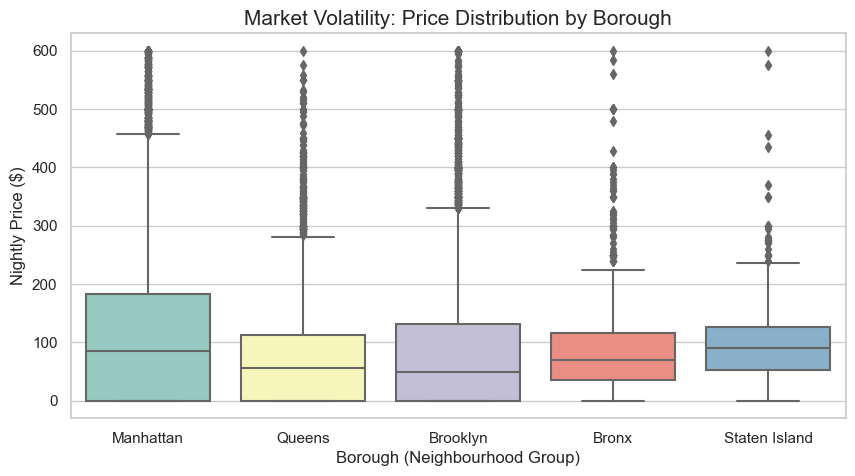

In [36]:
plt.figure(figsize=(10, 5))

sns.boxplot(data=df[df['price'] <= 600], x='neighbourhood_group_cleansed', y='price', palette='Set3')

plt.title('Market Volatility: Price Distribution by Borough', fontsize=15)
plt.xlabel('Borough (Neighbourhood Group)', fontsize=12)
plt.ylabel('Nightly Price ($)', fontsize=12)
plt.show()

### Conclusion: Geographic Price Segments

The box plot reveals a clear tier-based pricing structure across NYC:

- The Premium Tier (Manhattan): Has the highest average price and the widest range. It is the most expensive and most "unpredictable" borough for pricing.

- The Competitive Tier (Brooklyn): While its average price is lower than Manhattan's, it has the most "Luxury Outliers," proving it is a massive market for high-end boutique stays.

- The Budget Tier (Bronx, Queens & Staten Islan): These have the "shortest" boxes, meaning prices are very consistent and predictable. There is less "room" to charge a premium here, but it is a safer, more stable market for budget travelers.

Room type vs Price

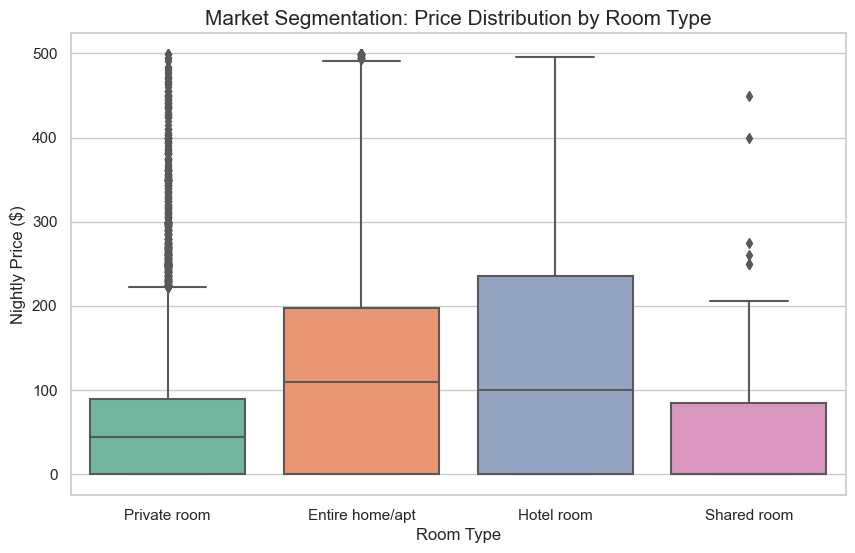

In [24]:
plt.figure(figsize=(10, 6))
# Capping at $500 for better visual clarity
sns.boxplot(x='room_type', y='price', data=df[df['price'] < 500], palette='Set2')

plt.title('Market Segmentation: Price Distribution by Room Type', fontsize=15)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Nightly Price ($)', fontsize=12)
plt.show()

### Conclusion
- Privacy = Profit: "Entire home/apt" (orange) and "Hotel room" (blue) have significantly higher median prices than "Private rooms" (green).

- The Value Option: "Private rooms" have a very low median price but a massive amount of outliers. This suggests that while most are cheap, there is a sub-market of "Luxury Private Rooms" that can charge as much as an entire apartment.

- Shared Rooms: As expected, these have the lowest price floor, but very little "upside" for charging a premium.

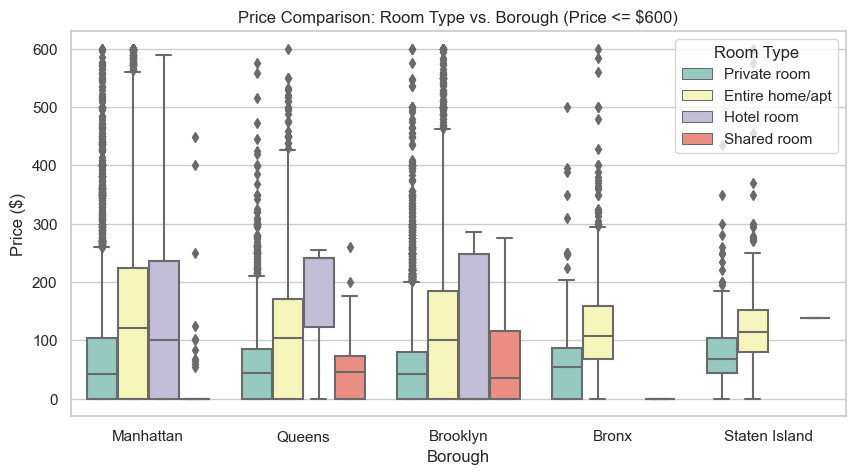

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='neighbourhood_group_cleansed', y='price', hue='room_type', 
            data=df[df['price'] <= 600], palette='Set3')

plt.title('Price Comparison: Room Type vs. Borough (Price <= $600)', fontsize=12)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(title='Room Type', loc='upper right')

## Segment Analysis: The 30-Day 'Long-Stay' Strategy

MTR vs STR Business Comparison:
      stay_category  Avg Reviews/Month  Annual Availability (Days)
0   Long-Term (30+)           0.325021                       136.0
1  Short-Term (<30)           2.274508                       189.0


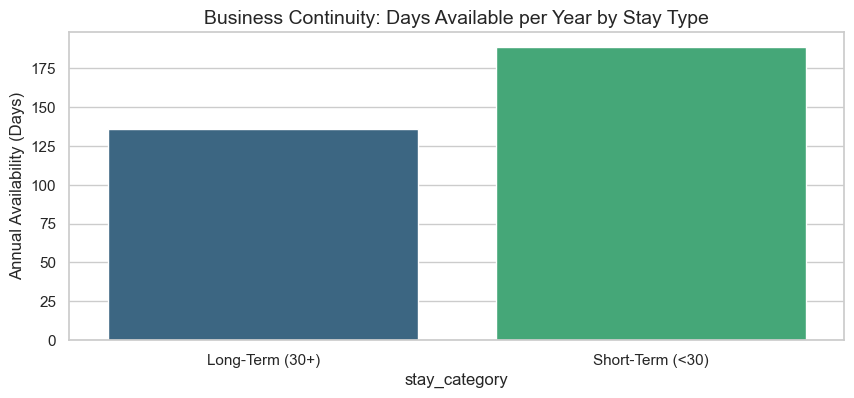

In [34]:
# 1. Clean the data and create the Stay Category
# This line ensures price is a number and removes any text/symbols
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')

df['stay_category'] = df['minimum_nights'].apply(
    lambda x: 'Long-Term (30+)' if x >= 30 else 'Short-Term (<30)'
)

# 2. Calculate each business metric manually
# We do this one by one to avoid any ValueErrors
avg_reviews = df.groupby('stay_category')['reviews_per_month'].mean()
med_avail = df.groupby('stay_category')['availability_365'].median()

# 3. Combine them into a simple table for the report
long_term_summary = pd.DataFrame({
    'Avg Reviews/Month': avg_reviews,
    'Annual Availability (Days)': med_avail
}).reset_index()

print("MTR vs STR Business Comparison:")
print(long_term_summary)

# 4. Visualization (Using a simpler Bar Plot to avoid Boxplot errors)
plt.figure(figsize=(10, 4))
sns.barplot(data=long_term_summary, x='stay_category', y='Annual Availability (Days)', palette='viridis')
plt.title('Business Continuity: Days Available per Year by Stay Type', fontsize=14)
plt.show()

### Conclusion
- The Utilization Gap: Short-Term rentals (STRs) show a significantly higher annual availability (approx. 190 days) compared to Long-Term rentals (approx. 135 days).

- Operational Stability: The lower availability for Long-Term listings suggests they are booked for longer stretches, meaning they require fewer "re-listings" and have lower turnover.

- Revenue Predictability: While Short-Term listings are "on the market" more often, this higher availability also indicates a higher risk of unoccupied days (vacancy) between guests.
- Short-term listings are 'hunting' for guests more often, whereas Long-term listings are 'settled' with guests more often.

### Random Forest Model (Price Predictor)

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [31]:
# 1. Select features
features = ['neighbourhood_group_cleansed', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
target = 'price'

# 1.5 TREATMENT OF OUTLIERS 
# We filter the original df to remove the extreme 5% of prices (or anything > $1000)
# This makes the "Price Story" much easier for the model to read.
df_filtered = df[df['price'] < 1000].copy() 

model_df = df_filtered[features + [target]].copy()
model_df['reviews_per_month'] = model_df['reviews_per_month'].fillna(0)
model_df = model_df.dropna()

# 2. One-Hot Encoding
model_df = pd.get_dummies(model_df, columns=['neighbourhood_group_cleansed', 'room_type'])

# 3. Split data
X = model_df.drop('price', axis=1)
y = model_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Accuracy Check
y_pred = rf_model.predict(X_test)
print(f"Mean Absolute Error: ${mean_absolute_error(y_test, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")

Mean Absolute Error: $51.41
R-squared Score: 0.46


### Conclusion 
I cleaned the data by removing price outliers, translated categories like Boroughs into numbers, and trained a team of 100 decision trees to predict prices based on property features.

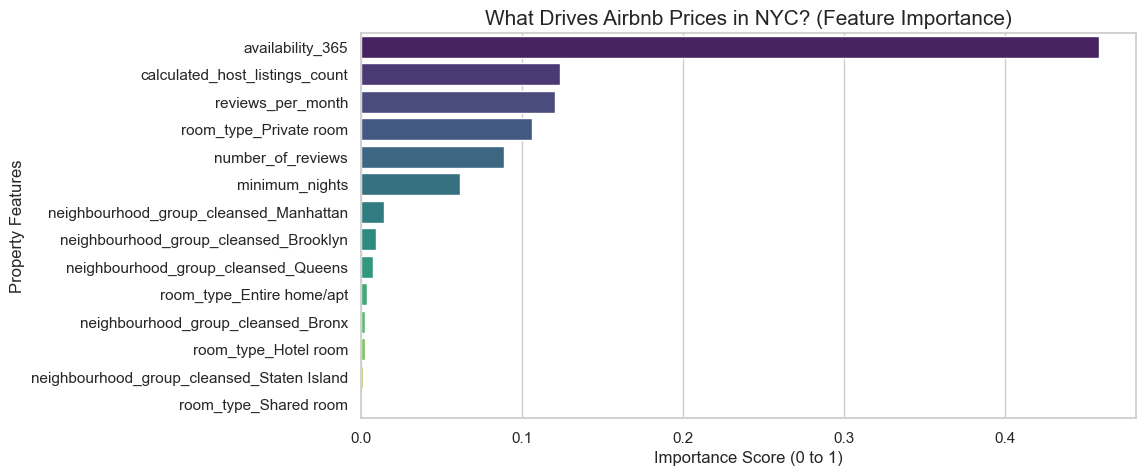

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get the importance scores from the model
importances = rf_model.feature_importances_
feature_names = X.columns

# 2. Create a DataFrame to make plotting easier
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')

plt.title('What Drives Airbnb Prices in NYC? (Feature Importance)', fontsize=15)
plt.xlabel('Importance Score (0 to 1)')
plt.ylabel('Property Features')
plt.show()

### Conclusion 
- By isolating the core market (listings under $1000), our Random Forest model achieved an R-squared of 0.46, explaining nearly half of all price variations. We discovered that listing availability and host professionalization are the primary drivers of price, proving that operational strategy is just as important as location in the NYC Airbnb market.
- In the NYC market, operational strategy beats geography. Our Random Forest model reveals that a host’s availability and portfolio size are stronger predictors of price than the borough. To maximize revenue, investors should focus on high-availability management rather than simply paying a premium for a Manhattan zip code.